# 1. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# 2.Data Preparation

In [2]:
data = pd.read_csv('Concrete Compressive Strength.csv')
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
data=data.rename(
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
       'Water  (component 4)(kg in a m^3 mixture)':'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg', 'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [119]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.514933,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,32.514933,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,32.514933,44.296075


In [7]:
data.shape

(1030, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Observations:
1.All of the data in the dataset is numerical, no categorical data types present.<br>
2.No null/NAN data.<br>
3.Age data appears to have outliers because max value is very large as compared to 3rd IQR value.

# 3.Exploratory Data Analytics

## 3.1 Univariate Analysis
Let's check the nature and shape of the distribution of the individual predictors.

In [10]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_mean = data[x].mean()
    x_std = data[x].std()
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(Mean) : {round(x_mean, 3)}\n'
          f'{x.capitalize()}(Standard Deviation) : {round(x_std, 3)}\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Cement Attribute:
Cement(Mean) : 281.166
Cement(Standard Deviation) : 104.507
Cement(min) : 102.0
Q1                    : 192.375
Q2(Median)            : 272.9
Q3                    : 350.0
Cement(max) : 540.0


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


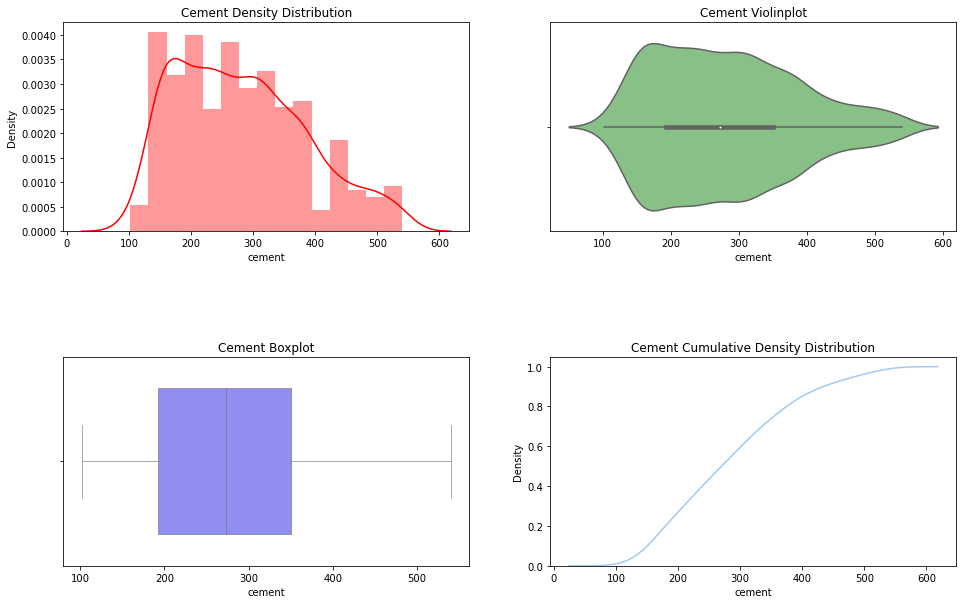

In [11]:
summary('cement')

### Observation:
1.Cement is uniformly distributed with a median of 272.9 kg/m^3 mixture.<br>
2.There are no outlier values.

5 Point Summary of Slag Attribute:
Slag(Mean) : 73.895
Slag(Standard Deviation) : 86.279
Slag(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 22.0
Q3                    : 142.95
Slag(max) : 359.4


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


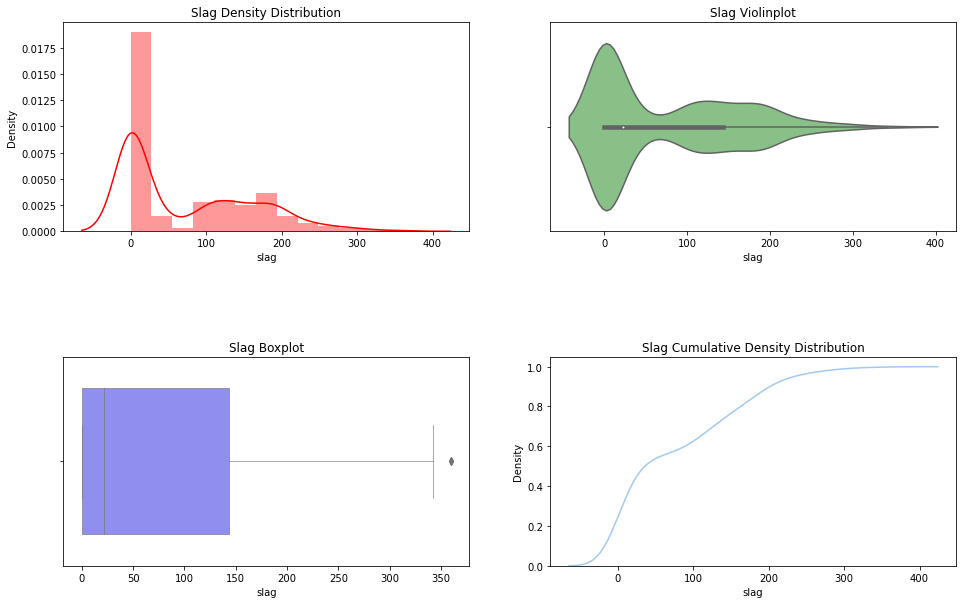

In [12]:
summary('slag')

### Observation:
1.The distribution of Slag values is left skewed with a median value of 22.0 kg/m^3.<br>
2.There are outlier values in the right tail of the distribution.

5 Point Summary of Ash Attribute:
Ash(Mean) : 54.187
Ash(Standard Deviation) : 63.996
Ash(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 118.27
Ash(max) : 200.1


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


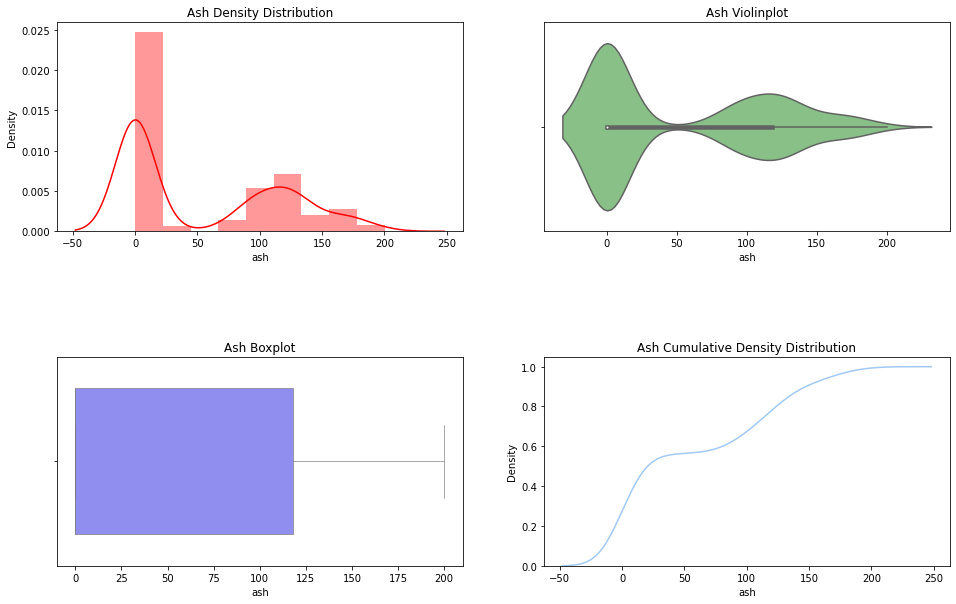

In [13]:
summary('ash')

## Observation:
1.The distribution of Ash values is distinctly bi-modal and left skewed with a median value of 0.0 kg/m^3.<br>
2.There are no outlier values in the distribution.

5 Point Summary of Water Attribute:
Water(Mean) : 181.566
Water(Standard Deviation) : 21.356
Water(min) : 121.75
Q1                    : 164.9
Q2(Median)            : 185.0
Q3                    : 192.0
Water(max) : 247.0


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


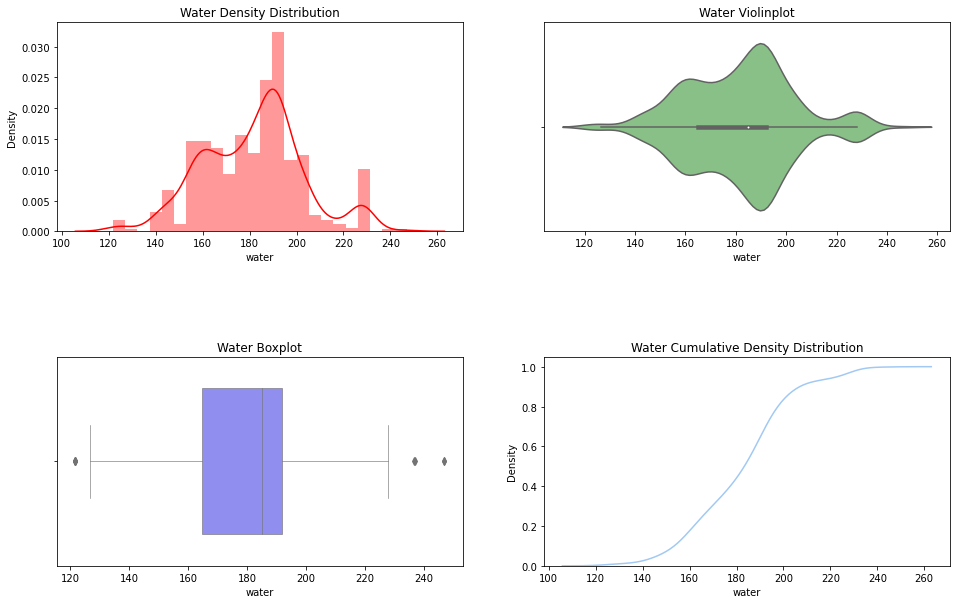

In [14]:
summary('water')

## Observation:
1.The distribution of Water values is uneven with a median value of 185.0 kg/m^3.<br>
2.There are outlier values in both tails of the distribution.

5 Point Summary of Superplastic Attribute:
Superplastic(Mean) : 6.203
Superplastic(Standard Deviation) : 5.973
Superplastic(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 6.35
Q3                    : 10.16
Superplastic(max) : 32.2


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


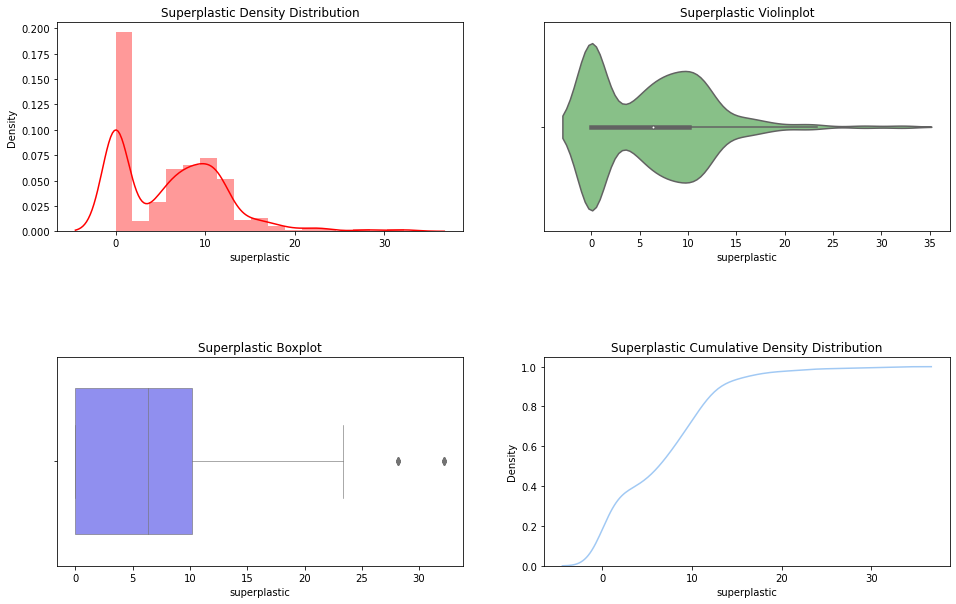

In [15]:
summary('superplastic')

## Observation:
1.The distribution of Superplastic values is distinctly bi-modal and left skewed with a median value of 6.4 kg/m^3.<br>
2.There are outlier values in the right tail of the distribution.

5 Point Summary of Coarseagg Attribute:
Coarseagg(Mean) : 972.919
Coarseagg(Standard Deviation) : 77.754
Coarseagg(min) : 801.0
Q1                    : 932.0
Q2(Median)            : 968.0
Q3                    : 1029.4
Coarseagg(max) : 1145.0


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


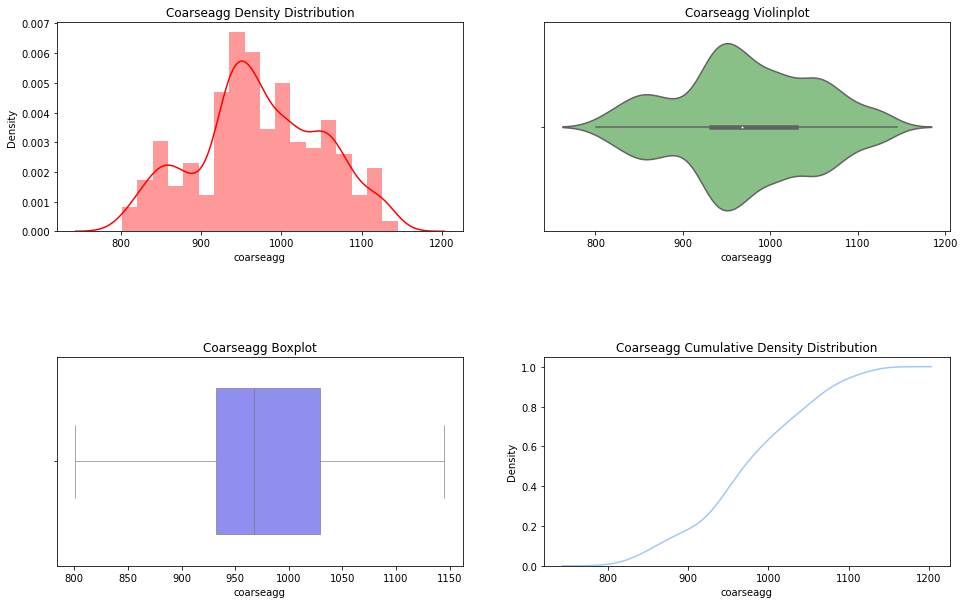

In [16]:
summary('coarseagg')

## Observation:
1.The distribution of Coarseagg values is uneven with a median value of 968.0 kg/m^3.<br>
2.There are no outlier values in the distribution.

5 Point Summary of Fineagg Attribute:
Fineagg(Mean) : 773.579
Fineagg(Standard Deviation) : 80.175
Fineagg(min) : 594.0
Q1                    : 730.95
Q2(Median)            : 779.51
Q3                    : 824.0
Fineagg(max) : 992.6


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


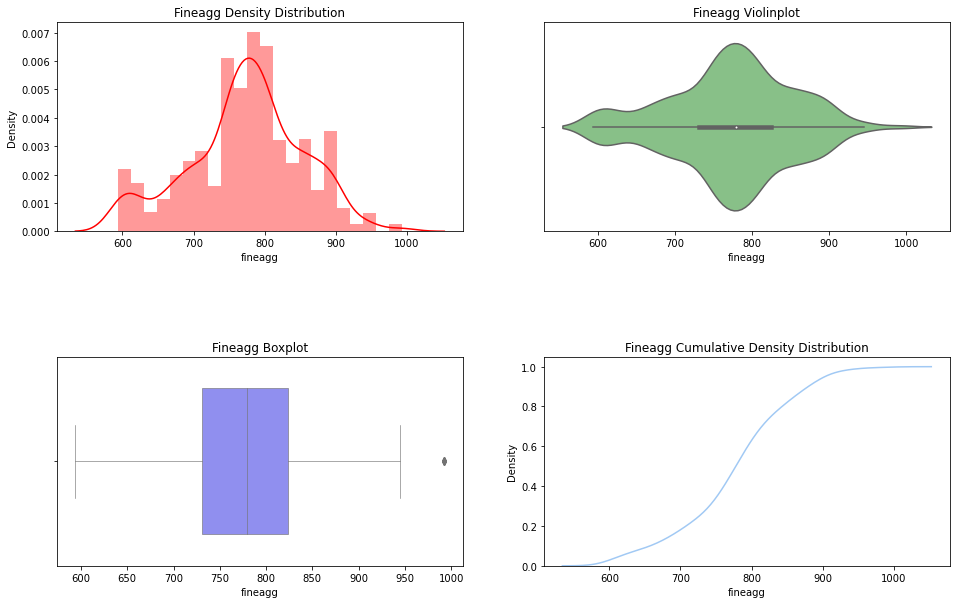

In [17]:
summary('fineagg')

## Observation:
1.The distribution of Fineagg values is uneven with a median value of 779.5 kg/m^3.<br>
2.There are outlier values in the right tail of distribution.

5 Point Summary of Age Attribute:
Age(Mean) : 45.662
Age(Standard Deviation) : 63.17
Age(min) : 1
Q1                    : 7.0
Q2(Median)            : 28.0
Q3                    : 56.0
Age(max) : 365


C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


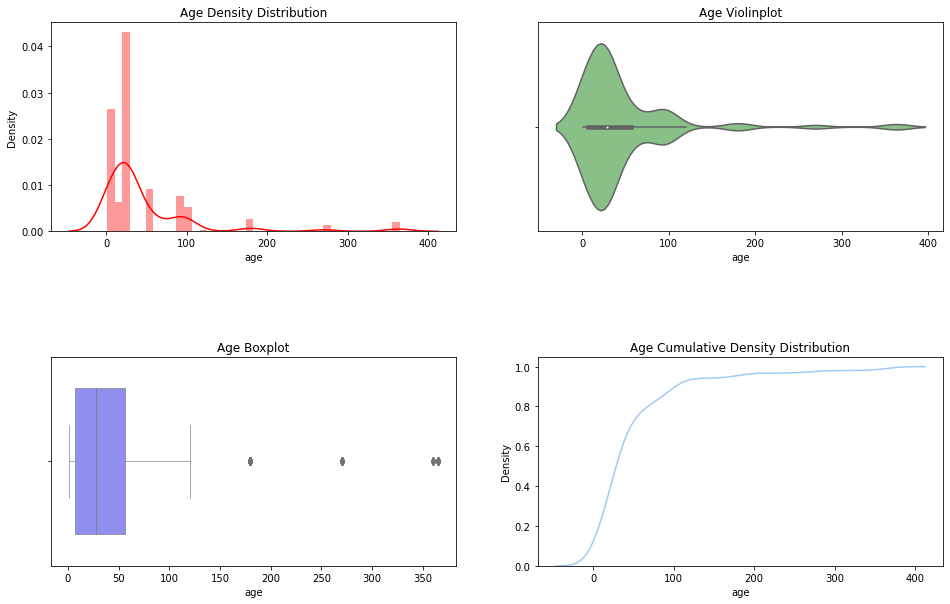

In [18]:
summary('age')

## Observation:
1.The distribution of Age values is extremely left skewed with a median value of 28 Days.<br>
2.There are a lot of outlier values in the right tail of the distribution.

# Distribution of the Target variable (Strength)

C:\Users\hemak\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


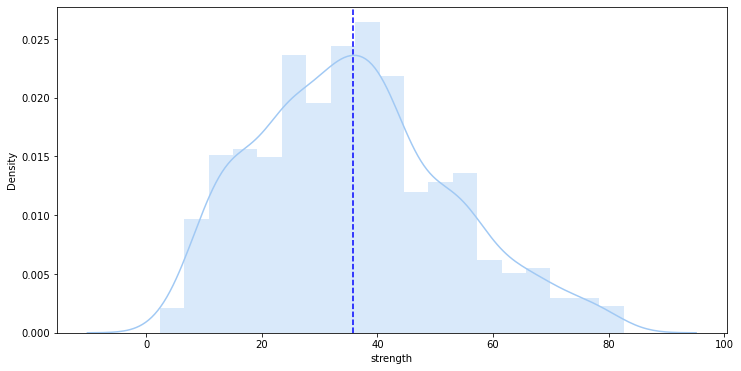

In [19]:
fig = plt.figure(figsize=(12, 6))
plt.axvline(data.strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.strength);

## 3.2. Multi-variate Analysis
### Correlation Heat Map

C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


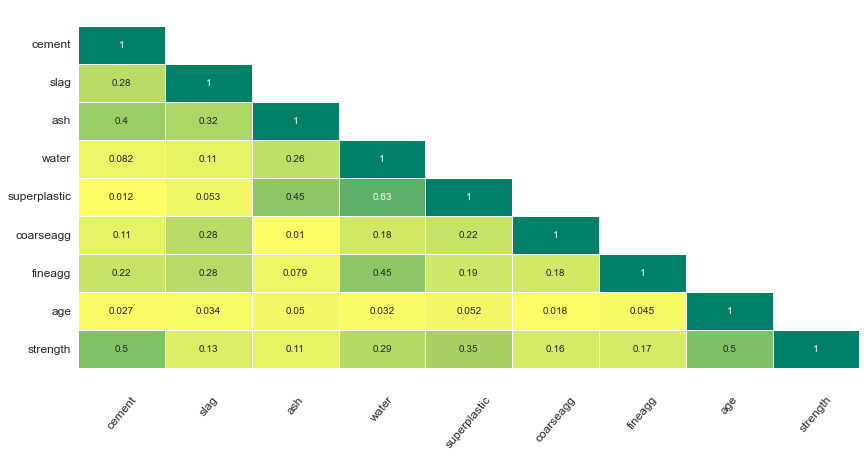

In [105]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))

mask = lower == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (14,7))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
g = sns.heatmap(lower, center=0.5, cmap= 'summer_r', annot= True, xticklabels = corr_matrix.index, 
                yticklabels = corr_matrix.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.tick_params(labelsize=12)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.show()

## Observations
1.As expected, cement and age have strong correlation with strength<br>
2.Super plastic has mild positive correlation with strength<br>
3.As expected, water and superplastic have strong correlation

# 4. Data Pre-Processing
##  Creating Helper Classes for Pre-Processing and Model Training

In [32]:
class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None

In [123]:
class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=5):
        results = pd.DataFrame(columns=['model', 'RMSE','MSE', 'MAE', 'r2_score','adj_r2_score'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            y_pred = regressor.get().predict(self.split_data[1])
            n=self.split_data[1].shape[0]
            k=self.split_data[1].shape[1]
            results = results.append({
                'model': regressor.get_name(),
                'MSE':round(mean_squared_error(self.split_data[3],y_pred), 3),
                'RMSE': round(np.sqrt(mean_squared_error(self.split_data[3],y_pred)), 3),
                'MAE': round(mean_absolute_error(self.split_data[3],y_pred),3),
                'r2_score': r2_score(self.split_data[3],y_pred),
                'adj_r2_score':1 - ((1-(r2_score(self.split_data[3],y_pred)))*(n-1)/(n-k-1))
                }, ignore_index=True)

        return results

In [130]:
class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=5):
        results = pd.DataFrame(columns=['model', 'RMSE','MSE', 'MAE', 'r2_score','adj_r2_score','r2_score_whole','adj_r2_score_whole'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            y_pred = regressor.get().predict(self.split_data[1])
            n1=self.data.shape[0]
            k1=self.data.shape[1]
            n=self.split_data[1].shape[0]
            k=self.split_data[1].shape[1]
            results = results.append({
                'model': regressor.get_name(),
                'MSE':round(mean_squared_error(self.split_data[3],y_pred), 3),
                'RMSE': round(np.sqrt(mean_squared_error(self.split_data[3],y_pred)), 3),
                'MAE': round(mean_absolute_error(self.split_data[3],y_pred),3),
                'r2_score': r2_score(self.split_data[3],y_pred),
                'adj_r2_score':1 - ((1-(r2_score(self.split_data[3],y_pred)))*(n-1)/(n-k-1)),
                'r2_score_whole': round(regressor.get().score(self.data.drop(self.target, axis=1),self.data[self.target]), 3),
                'adj_r2_score_whole':1 - ((1-(regressor.get().score(self.data.drop(self.target, axis=1),self.data[self.target])))*(n1-1)/(n1-k1-1)),
                }, ignore_index=True)

        return results

In [ ]:
regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target]

In [ ]:
training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),

In [82]:
class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

# 5. Model Building

### We will try the following algorithms:

1.Linear Regression<br>
2.Linear Regression with Polynomial features of degree 2<br>
3.Linear Regression with Polynomial features of degree 3<br>
4.Ridge<br>
5.Ridge with polynomial features of degree 2<br>
6.Ridge with polynomial features of degree 3<br>
7.Lasso<br>
8.Lasso with polynomial features of degree 2<br>
9.Lasso with polynomial features of degree 3<br>
10.Decision Trees<br>
11.Random forest<br>
12.Ada boosting<br>
13.Gradient boosting<br>
14.KNN<br>
15.Support Vector machines.

In [75]:
regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression degree 2', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression degree 3', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge degree 2', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge degree 3', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso degree 2', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso degree 3', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

In [131]:
# Iteration 1 - Use all data
result = ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result.sort_values(['RMSE'], ascending=True).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result

,model,RMSE,MSE,MAE,r2_score,adj_r2_score,r2_score_whole,adj_r2_score_whole
0,Linear Regression,9.103,82.863,6.963,0.693754,0.685588,0.719,0.716308
1,Linear Regression degree 2,6.463,41.770,5.069,0.845628,0.841511,0.862,0.860304
2,Linear Regression degree 3,5.464,29.860,4.058,0.889645,0.886702,0.929,0.928197
3,Ridge,9.105,82.892,6.970,0.693649,0.685479,0.719,0.716267
4,Ridge degree 2,6.445,41.540,5.058,0.846479,0.842385,0.861,0.859870
5,Ridge degree 3,5.606,31.424,4.234,0.883865,0.880768,0.924,0.923287
6,Lasso,9.734,94.742,7.648,0.649855,0.640518,0.687,0.684619
7,Lasso degree 2,8.537,72.882,6.608,0.730642,0.723459,0.764,0.761616
8,Lasso degree 3,8.406,70.653,6.540,0.738882,0.731919,0.780,0.778431
9,Decision Tree,10.137,102.761,7.630,0.620215,0.610088,0.719,0.716242


In [83]:
# Iteration 2 - Ouliers treatment

# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((data > (q3+1.5*IQR)) | (data < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(data), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [84]:
data[['age','superplastic']] = OutliersImputer().fit_transform(data[['age','superplastic']])

C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [87]:
# Iteration 1 - Use all data
result_outliers_treatment= ModelsBuilder(regressors, data, 'strength').build()
tmp_best = result_outliers_treatment.sort_values(['RMSE'], ascending=True).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_outliers_treatment = result_outliers_treatment.append(tmp_best, ignore_index=True)
result_outliers_treatment

,model,RMSE,MSE,MAE,r2_score,adj_r2_score
0,Linear Regression,9.103,82.863,6.963,0.693754,0.685588
1,Linear Regression degree 2,6.463,41.770,5.069,0.845628,0.841511
2,Linear Regression degree 3,5.464,29.860,4.058,0.889645,0.886702
3,Ridge,9.105,82.892,6.970,0.693649,0.685479
4,Ridge degree 2,6.445,41.540,5.058,0.846479,0.842385
5,Ridge degree 3,5.606,31.424,4.234,0.883865,0.880768
6,Lasso,9.734,94.742,7.648,0.649855,0.640518
7,Lasso degree 2,8.537,72.882,6.608,0.730642,0.723459
8,Lasso degree 3,8.406,70.653,6.540,0.738882,0.731919
9,Decision Tree,10.137,102.761,7.630,0.620215,0.610088


## Observations
1.Outliers treatment improves the overall performace on most of the models.<br>
2.Removing the features (ash, coarseagg and fineagg) does not affect the models.<br>
3.Gradient boosting is clearly the best model. It provides better model performance with minimum RMSE ,maximum r2_score	and adj_r2_score.

## Calculating Feature Importance

In [88]:
rf_pipeline = Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True)
rf_clf = rf_pipeline.get()
rf_clf

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=4, random_state=42))])

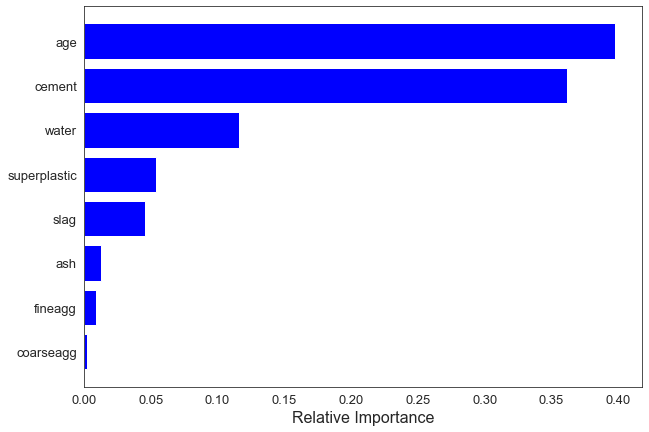

In [89]:
X = data.drop('strength', axis  = 1)
y = data['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_pipeline.feature_imp()
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()

In [91]:
# Iteration 3 - Remove features based on feature importance
result_feature_engg = ModelsBuilder(regressors, data.drop(['ash', 'coarseagg', 'fineagg'], axis=1), 'strength').build()
tmp_best = result_feature_engg.sort_values(['RMSE'], ascending=True).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_feature_engg = result_feature_engg.append(tmp_best, ignore_index=True)
result_feature_engg

,model,RMSE,MSE,MAE,r2_score,adj_r2_score
0,Linear Regression,9.487,90.011,7.387,0.667338,0.661849
1,Linear Regression degree 2,7.397,54.715,5.738,0.797786,0.794450
2,Linear Regression degree 3,6.753,45.601,5.052,0.831469,0.828688
3,Ridge,9.488,90.022,7.390,0.667298,0.661808
4,Ridge degree 2,7.399,54.740,5.738,0.797694,0.794356
5,Ridge degree 3,6.758,45.675,5.053,0.831194,0.828409
6,Lasso,9.743,94.920,7.656,0.649195,0.643406
7,Lasso degree 2,8.513,72.475,6.602,0.732148,0.727728
8,Lasso degree 3,8.538,72.892,6.575,0.730608,0.726163
9,Decision Tree,10.137,102.761,7.630,0.620215,0.613948


C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\hemak\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used t

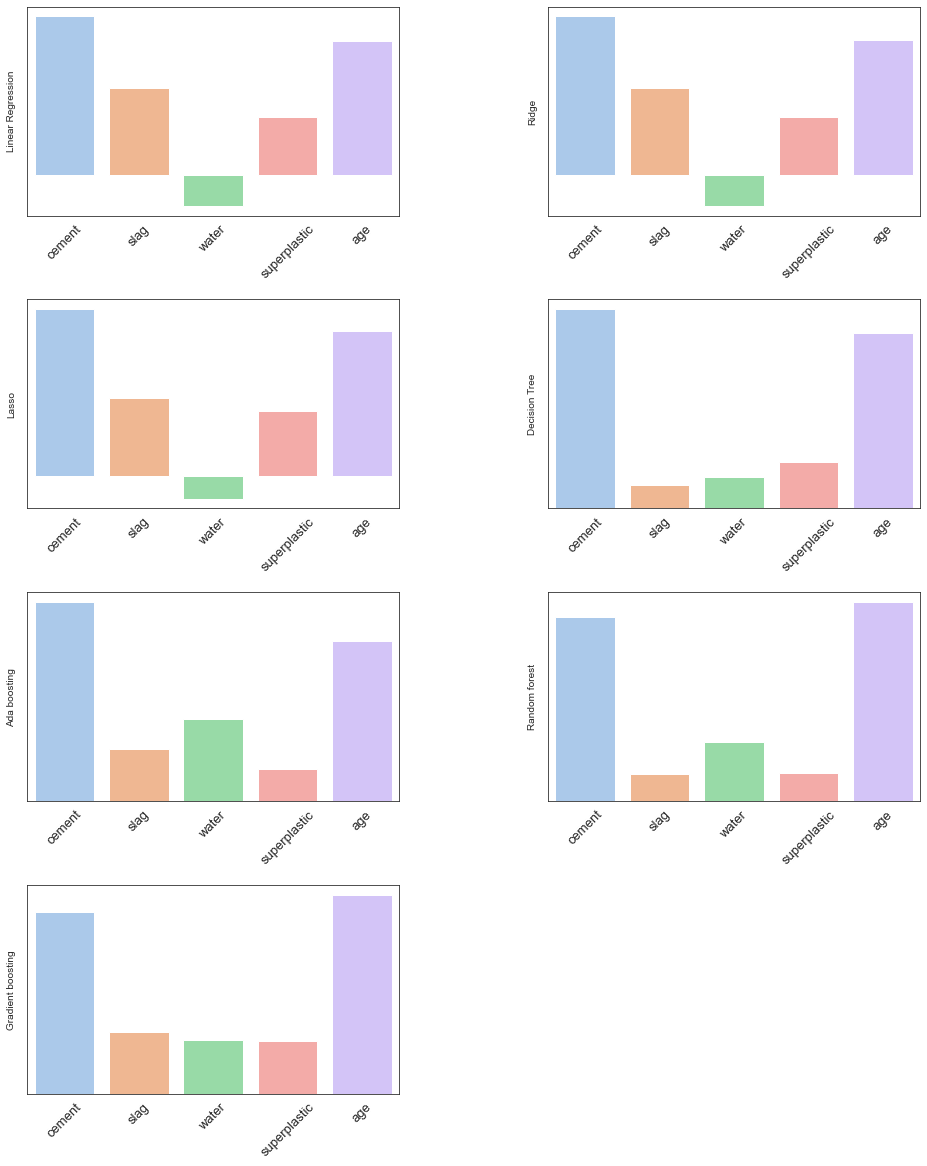

In [92]:
columns = data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1).columns
feature_imp = pd.DataFrame(index=columns)
for r in regressors:
    fi = r.feature_imp()
    if fi is not None and len(fi) == len(columns):
        feature_imp[r.get_name()] = fi


plt.figure(figsize=(16, 20))
for i, col in enumerate(feature_imp.columns):
    plt.subplot(4, 2, i+1)
    ax = sns.barplot(x=feature_imp.index, y=feature_imp[col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize = 13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)
    
plt.subplots_adjust(hspace=0.4, wspace=0.4)

## 6. Model Selection and Hyperparameter Tuning
At this point we can conclude that Gradient boosting is perfect fit to predict the strength of concrete based on the given dataset.

Now we can tune the hyper parameters for gradient boosting.

Steps:
*  Split the data into training and testing set (80-20)
*  Use the training data to perform cross validation hyper parameter tuning using Grid Search
*  Check the best performing model against the test set

In [93]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1), 
                                                   data['strength'], 
                                                   test_size = 0.2, 
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

## 6.1 Randomized Search

In [94]:
# Prepare parameter grid
param_grid = {
    'criterion': ['mse', 'mae'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(3, 8)),
    'n_estimators': list(range(50, 500, 100))
}

In [102]:
# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=1, cv = 5)
rs.fit(X_train, y_train)

In [96]:
y_pred=rs.predict(X_test)

In [101]:
n=206
k=5
print(f"MSE: {round(mean_squared_error(y_test,y_pred), 3)}")
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test,y_pred)), 3)}')
print(f'MAE: {round(mean_absolute_error(y_test,y_pred),3)}') 
print(f'r2_score: {r2_score(y_test,y_pred)}')
print(f'adj_r2_score: {1 - ((1-(r2_score(y_test,y_pred)))*(n-1)/(n-k-1))}')    

MSE: 19.696
RMSE: 4.438
MAE: 3.247
r2_score: 0.923566158874347
adj_r2_score: 0.9216553128462057


## 5.2 Conclusion
In the above study, we find that in order to predict the strength of concrete

* The features that affect the strength are cement, slag, water, superplastic and age
* The best model is Gradient Boosting Regressor.
* Using the above model, we can predict the strength with an RMSE 4.438 

In [106]:
X = data.drop('strength', axis  = 1)
y = data['strength']

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [108]:
X = sc.fit_transform(X)

In [109]:
from sklearn.decomposition import PCA
pca = PCA()

In [110]:
X = pca.fit_transform(X)

In [111]:
explained_variance = pca.explained_variance_ratio_

In [112]:
explained_variance

array([0.27270869, 0.1755644 , 0.16075737, 0.12500433, 0.12345428,
       0.11467245, 0.024003  , 0.00383548])

In [113]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=6)
X_2 = pca2.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.30, random_state=42)

In [117]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 6), (309, 6), (721,), (309,))

In [115]:
# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=1, cv = 5)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hemak\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\hemak\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\hemak\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\hemak\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
C:\Users\hemak\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:3

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', None],
                                        'max_leaf_nodes': [3, 4, 5, 6, 7],
                                        'n_estimators': [50, 150, 250, 350,
                                                         450]},
                   return_train_score=True, verbose=1)

In [116]:
y_pred=rs.predict(X_test)

In [118]:
n=309
k=6
print(f"MSE: {round(mean_squared_error(y_test,y_pred), 3)}")
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test,y_pred)), 3)}')
print(f'MAE: {round(mean_absolute_error(y_test,y_pred),3)}') 
print(f'r2_score: {r2_score(y_test,y_pred)}')
print(f'adj_r2_score: {1 - ((1-(r2_score(y_test,y_pred)))*(n-1)/(n-k-1))}') 

MSE: 45.026
RMSE: 6.71
MAE: 4.863
r2_score: 0.8335925291930989
adj_r2_score: 0.8302864205015711
